### Introduction
Credit card fraud occurs when someone illegally uses another person's credit card details to make unauthorized transactions. It often happens through lost or stolen cards, phishing, scams, hacking, or fake websites, and can cause serious financial harm.

### Purpose
To combat credit card fraud, financial institutions need accurate detection systems. This project uses a synthetic dataset to build a classification model that identifies fraudulent transactions. The model is then tested on a real, imbalanced dataset of 284,807 transactions—only 492 of which are fraudulent—from European cardholders in September 2013, aiming for accurate and generalizable fraud detection.

In [60]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score, precision_recall_curve, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_score

In [61]:
%matplotlib inline

### Exploratory Data Analysis

In [62]:
syn_df = pd.read_csv("/content/train_creditcard.csv")

In [63]:
syn_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,120.436581,1
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1.554209,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,114.890244,1
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,18.647098,1
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,47.993053,1


In [64]:
syn_df.info()
# Time is number of seconds elapsed between this transaction and the first transaction
# V1 - V28 are 'masked' variables in order to protect the identity/information of the customers. They have
# undergone PCA and the values are not the original values of the dataset.
# Amount is the amount of money spent in that transaction
# Class 1 = fraudulent transaction, Class 0 = real transaction

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283726 entries, 0 to 283725
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [65]:
syn_df.loc[syn_df.duplicated() == True] #no duplicated values

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [66]:
syn_df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [67]:
syn_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


<Axes: xlabel='Class'>

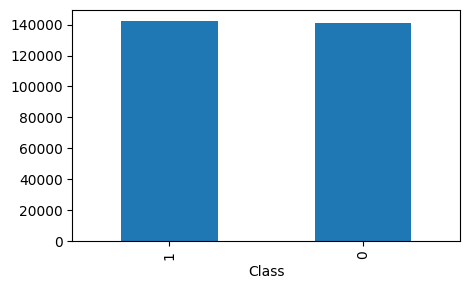

In [68]:
syn_df.Class.value_counts().plot(kind='bar', figsize=(5,3)) #1 is fraud, 0 is real

In [69]:
syn_df.describe() #summary statistics of each variable

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,44.364541,0.502228
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,155.192089,0.499996
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,1.634518,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,8.541802,1.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,33.669556,1.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,20769.092980,1.000000


At first glance of the data, we derive the following insights:
* There are more fraudulent data points than real transactions. This is synthesised data and not the original, created for the purposes of better training, which may be the reason why there are more fraudulent transactions than real ones.
* There are no duplicated data values, and no null or missing values.
* The distributions of all 30 independent variables are quite large in range, and could potentially have very skewed or non-Gaussian distributions.



In [70]:
syn_df['Class'] = syn_df['Class'].astype('object')
col_names = syn_df.columns.tolist()
col_names.pop()
print(col_names)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [71]:
def chunks(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

cols = list(chunks(col_names, 5))
cols #change shape of column list to make plotting easier

[['Time', 'V1', 'V2', 'V3', 'V4'],
 ['V5', 'V6', 'V7', 'V8', 'V9'],
 ['V10', 'V11', 'V12', 'V13', 'V14'],
 ['V15', 'V16', 'V17', 'V18', 'V19'],
 ['V20', 'V21', 'V22', 'V23', 'V24'],
 ['V25', 'V26', 'V27', 'V28', 'Amount']]

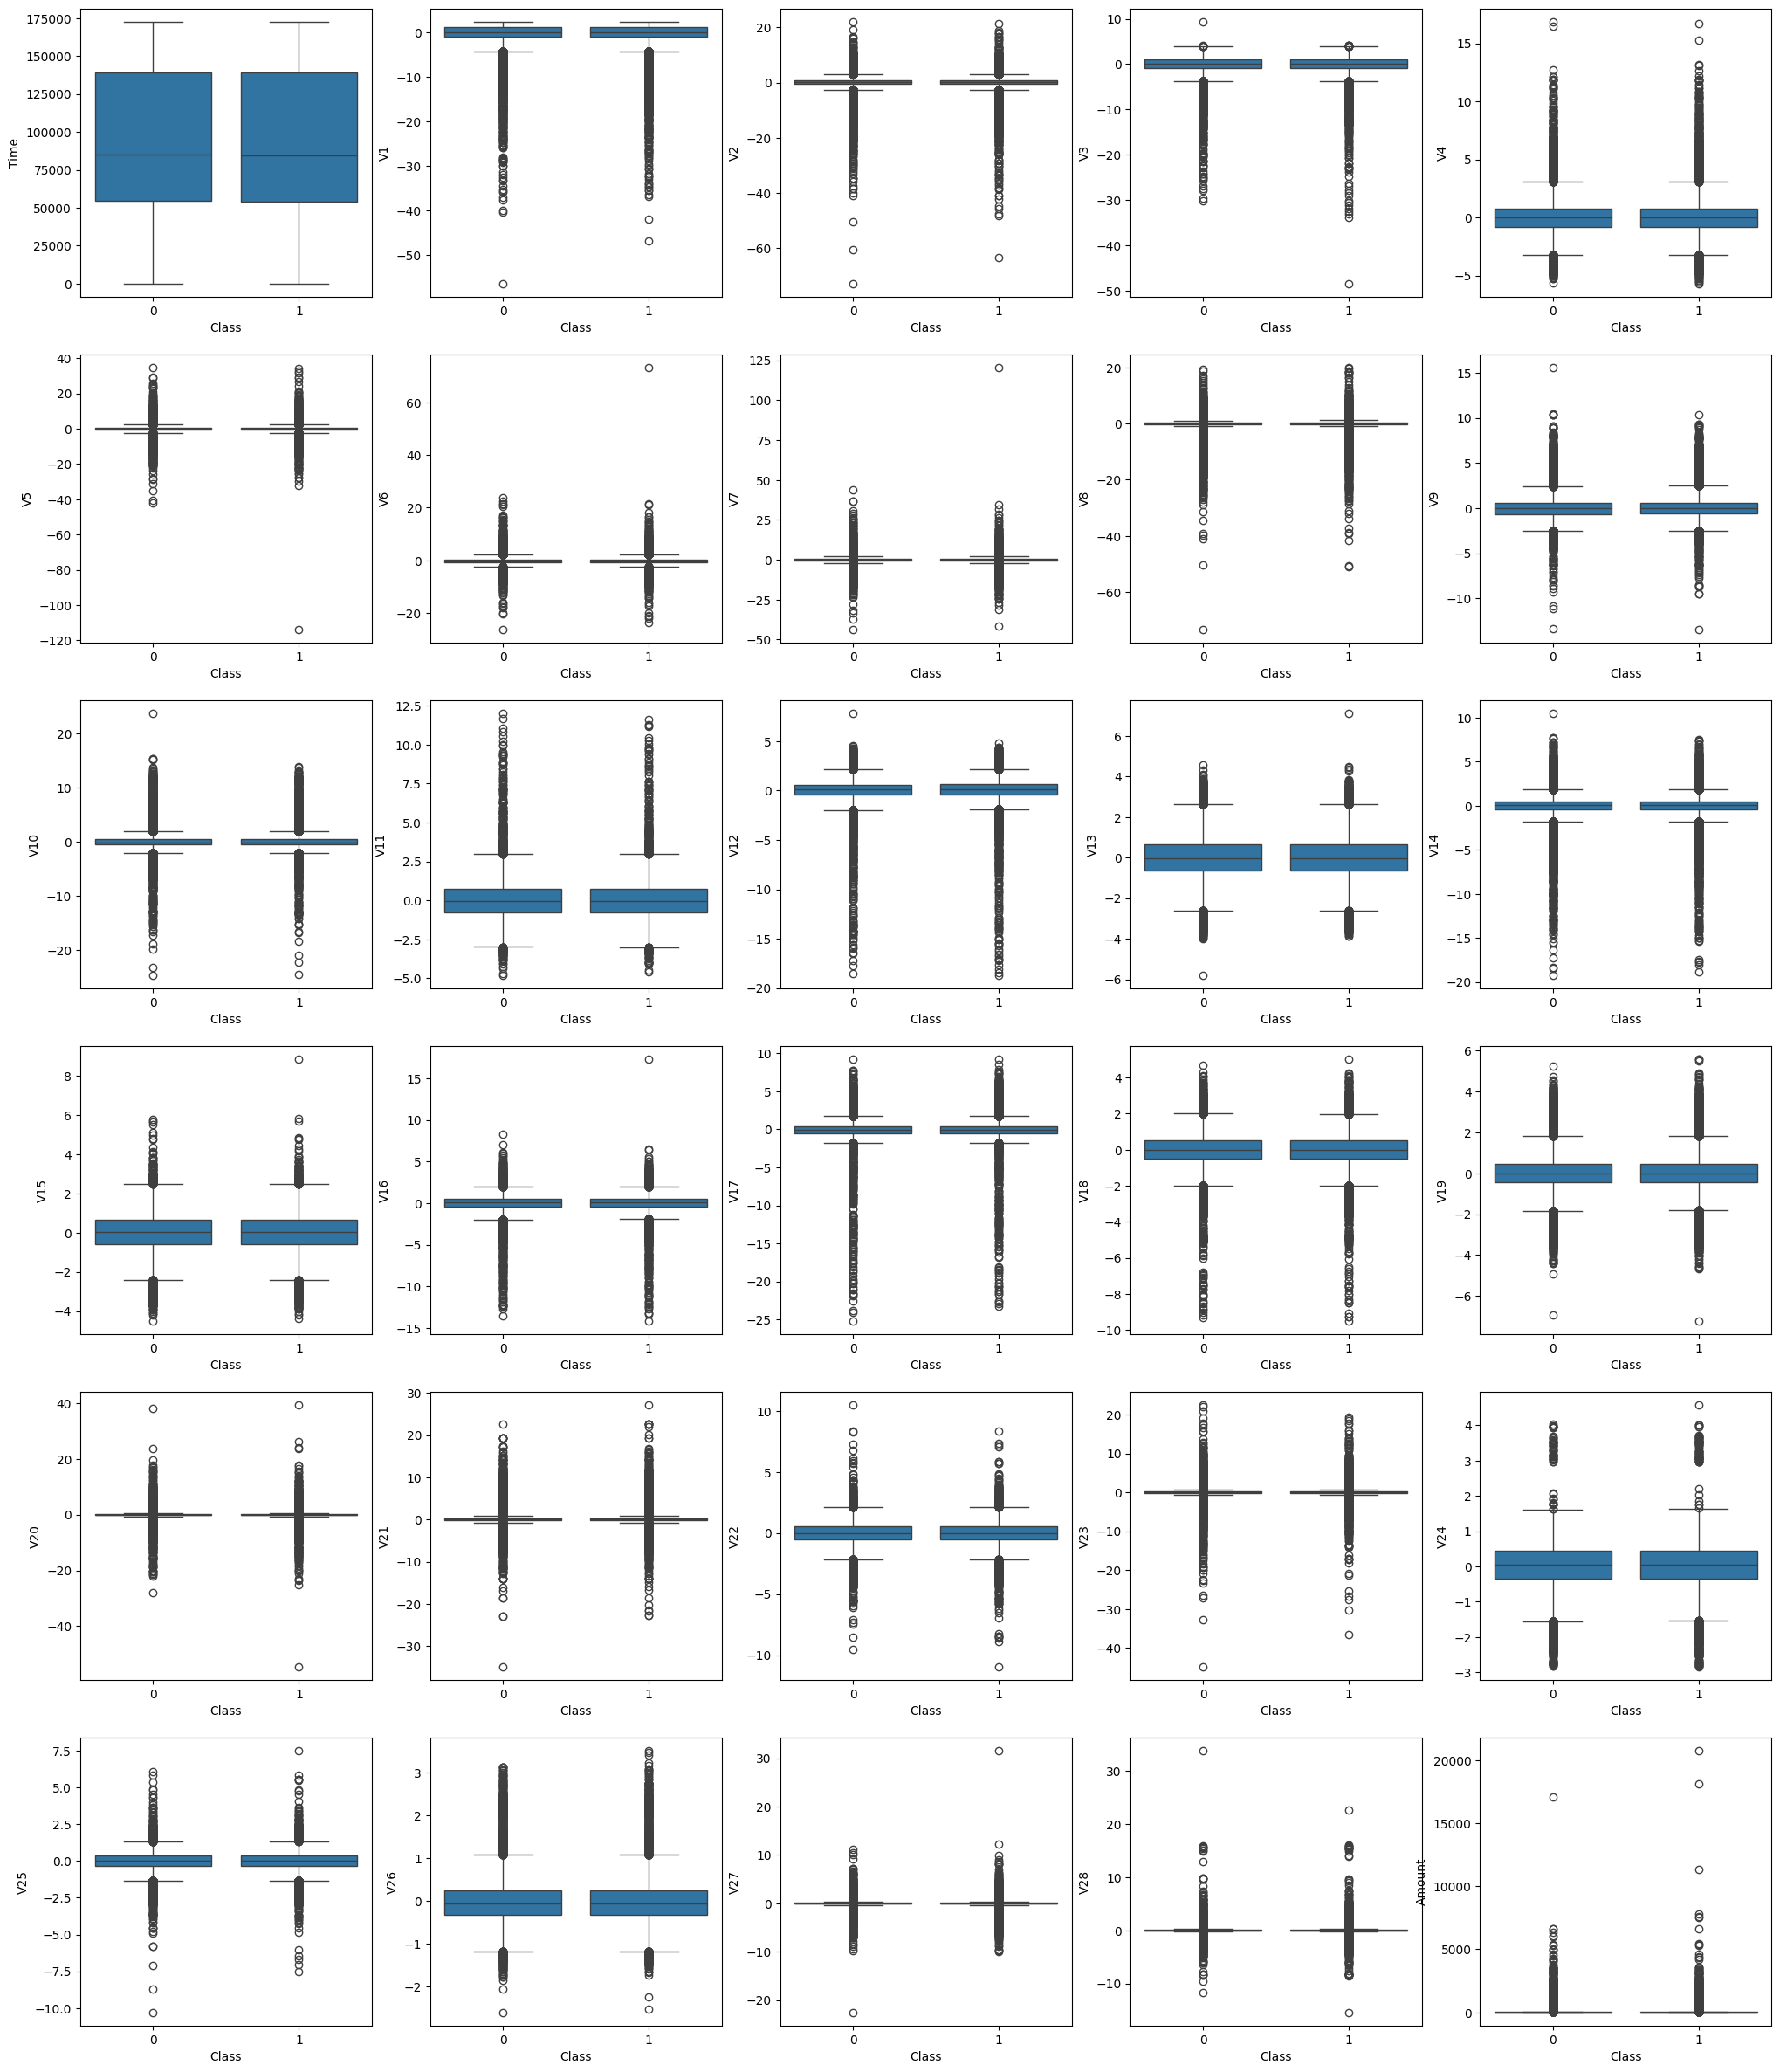

In [72]:
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(25,30))
for r in range(0,6):
    for c in range(0,5):
        sns.boxplot(data=syn_df, x='Class', y=cols[r][c], ax=axes[r][c])

# There are many outliers in the dataset across the many variables. Check the distributions for each of these variables next.

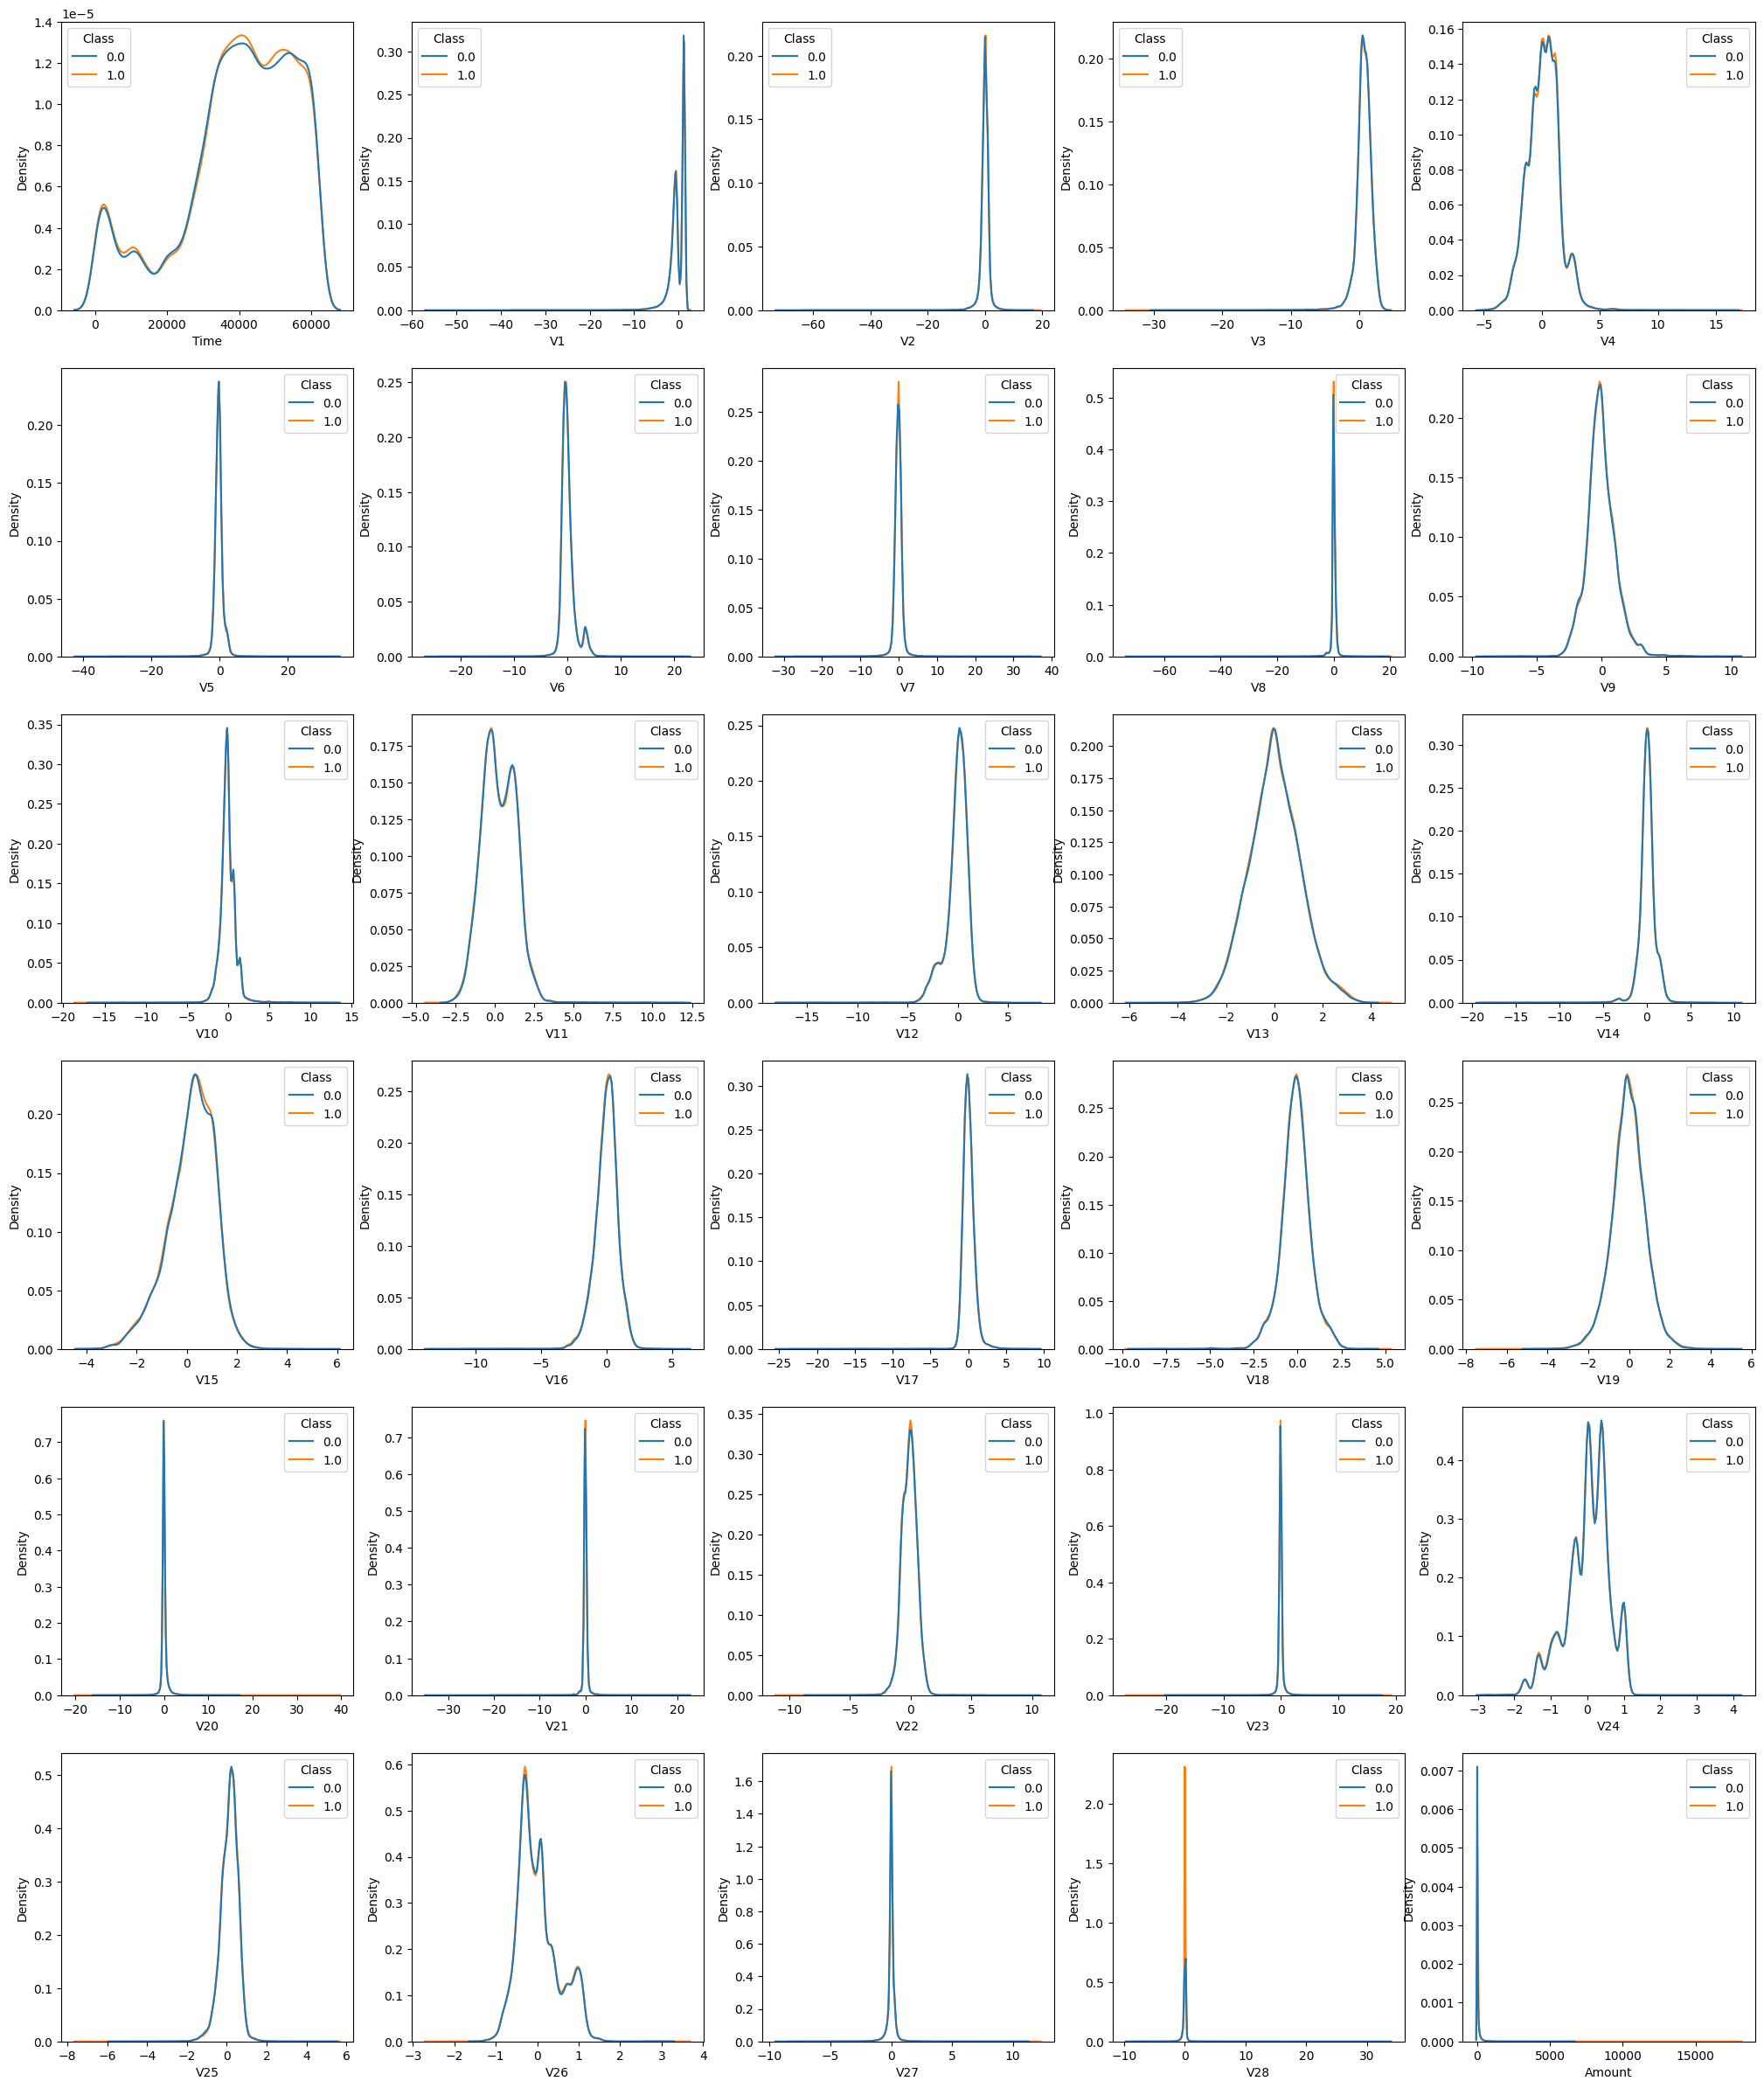

In [59]:
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(25,30))
for r in range(0,6):
    for c in range(0,5):
        sns.kdeplot(data=syn_df, x=cols[r][c], hue='Class', ax=axes[r][c])

# Some of the distributions are not normally distributed - Time in particular seems to separate into different segments.

We can see by checking the distributions of the 30 independent variables that there are significant numbers of outliers in the dataset, as well as varied distributions. Only a few of the variables have a normal/Gaussian distribution. Interestingly, the distributions for both classes seem to have some level of separability for certain variables (for example, in V10, V3, V7, V16, V12, and V14). However, most of the independent variables have both the fraudulent and real transaction classes overalapped.

In [73]:
syn_df['Class'] = syn_df['Class'].astype('int')
#in order to do correlation analysis, data type must be numerical

<Axes: >

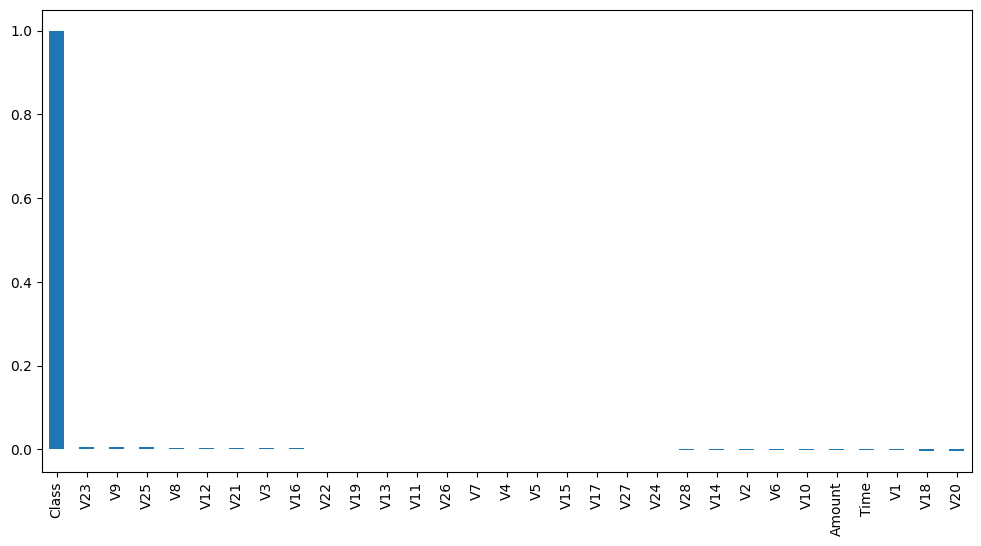

In [74]:
syn_df.corr()['Class'].sort_values(ascending = False).plot(kind='bar', figsize=(12,6))

Insights: the variables V4, V11, and V2 are important variables that are positively correlated with fraudulent credit card transactions.

This means an increase in these variables will lead to a higher likelihood that the transaction was fraudulent On the other hand, V12, V3, V14, and V10 are important variables that are negatively correlated with fradulent credit card transactions. An increase in these variables mean the transaction is less likely to be fraudulent. The distributions that were more separated are also the distributions that correlated least with fraudulent transactions.

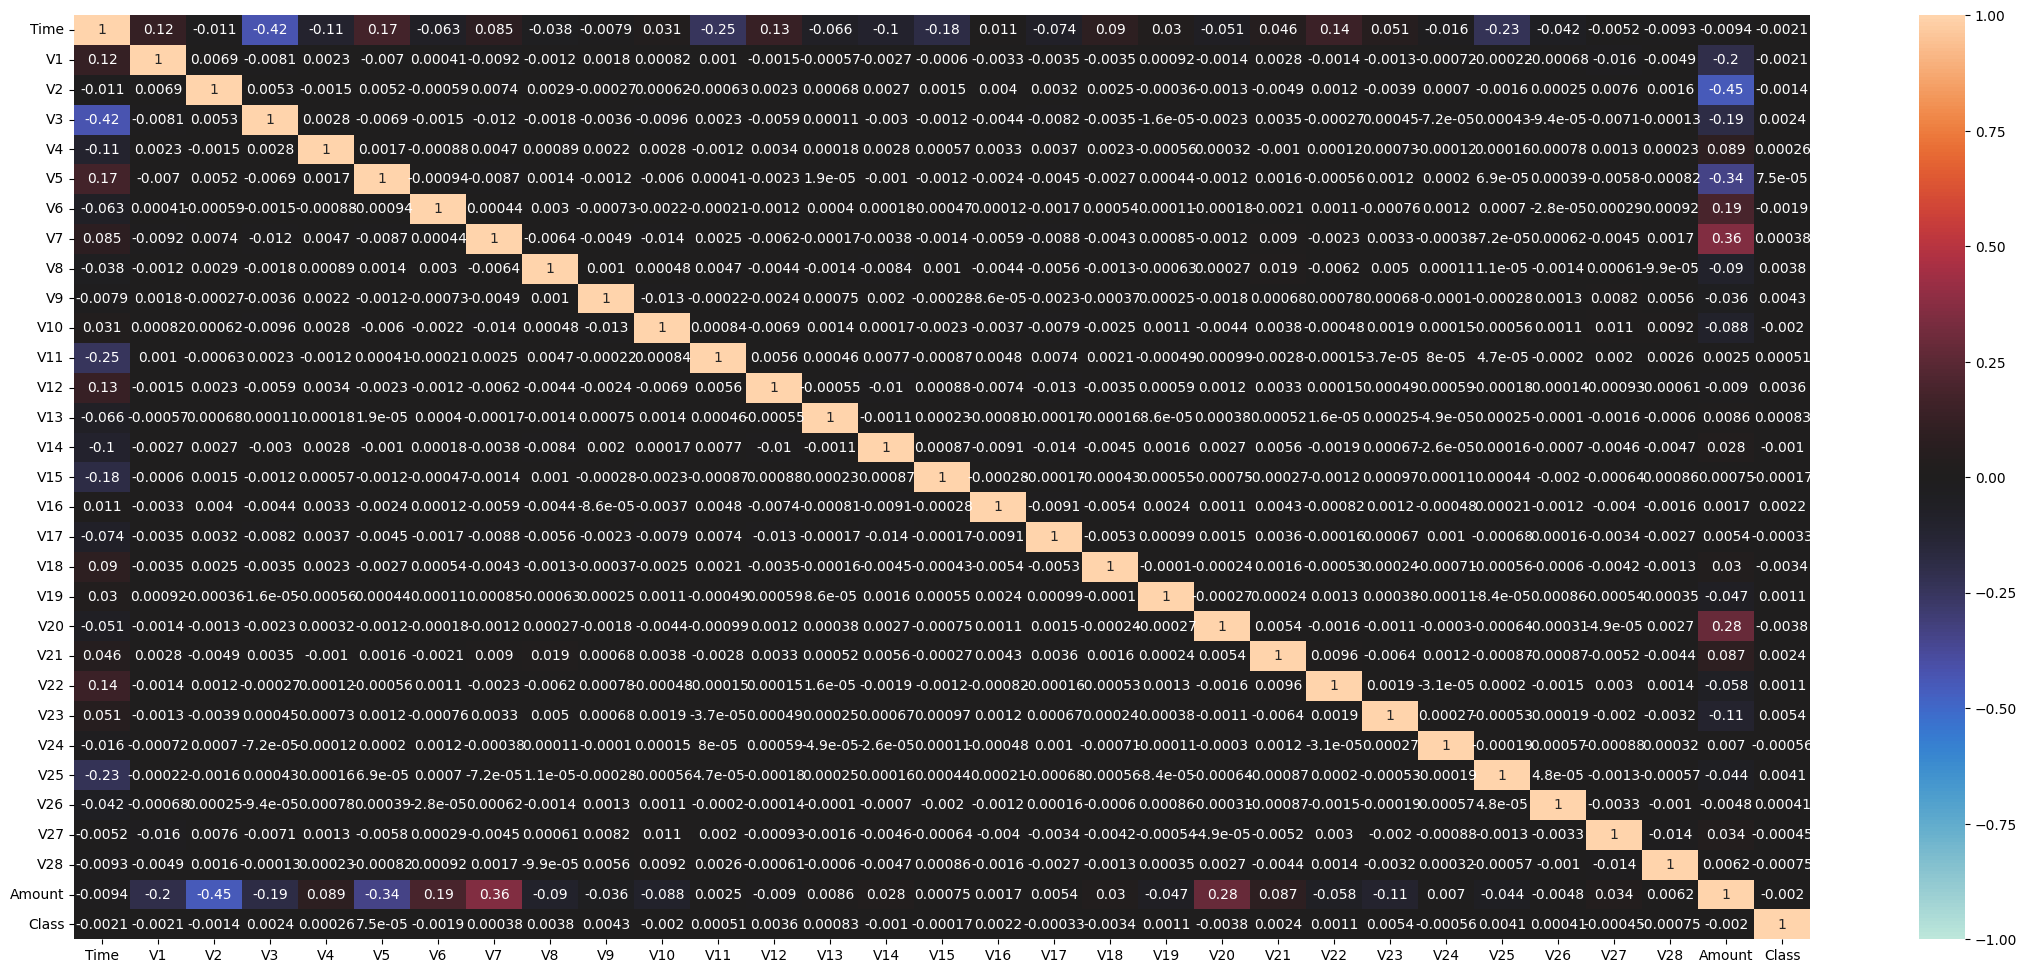

In [75]:
fig, ax = plt.subplots(1, figsize=(28,12))
ax = sns.heatmap(syn_df.corr(), vmin=-1, vmax=1, center=0, annot=True)

The findings of the previous bar graph can be re-confirmed here. Observe the variables that positively correlated strongly to fraudulent transactions, such as V4 and V11. Additionally, there are the variables that negatively correlated to fraudulent classes, such as V12 and V10.

### Training Different Models

In [76]:
# Get X and y into seperate arrays
X = syn_df.iloc[:, :-1].values
y = syn_df.Class.values

In [77]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

In [78]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

212794 70932 212794 70932


In [79]:
#Feature Scaling
sc = StandardScaler()
X_train, X_test = sc.fit_transform(X_train), sc.transform(X_test)

In [80]:
#Check the summary statistics of the features
X_train_transformed = pd.DataFrame(X_train)
X_train_transformed.describe().T

,count,mean,std,min,25%,50%,75%,max
0,212794.0,5.863479e-17,1.000002,-1.997529,-0.854096,-0.214110,0.937354,1.644428
1,212794.0,-1.167353e-16,1.000002,-24.156912,-0.476825,0.005908,0.673612,1.252611
2,212794.0,-1.793102e-17,1.000002,-38.565017,-0.364882,0.041112,0.490022,13.430043
3,212794.0,3.405893e-18,1.000002,-32.021459,-0.589516,0.117317,0.678457,6.214565
4,212794.0,7.172410e-17,1.000002,-3.957804,-0.598064,-0.012585,0.524724,11.941839
5,212794.0,-1.686251e-17,1.000002,-82.391400,-0.501395,-0.040288,0.442915,24.697874
6,212794.0,-4.006933e-18,1.000002,-17.650159,-0.576389,-0.205820,0.297618,55.069081
7,212794.0,-8.715079e-18,1.000002,-35.231860,-0.448746,0.030752,0.459947,97.530266
8,212794.0,-5.332560e-17,1.000002,-43.361081,-0.176674,0.019889,0.278926,17.031132
9,212794.0,-5.008666e-18,1.000002,-12.264306,-0.585059,-0.045615,0.546543,14.242720


In [81]:
#Quick evaluation function
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels,predictions)
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

### KNN Classifier

In [82]:
#Calling the KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [83]:
#Getting the model predictions
y_pred_knn = knn.predict(X_test)

Accuracy is: 50.17340551514127
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     35308
           1       0.50      0.51      0.50     35624

    accuracy                           0.50     70932
   macro avg       0.50      0.50      0.50     70932
weighted avg       0.50      0.50      0.50     70932

Precision is: 0.5039319396636163
Recall is: 0.5054738378621154


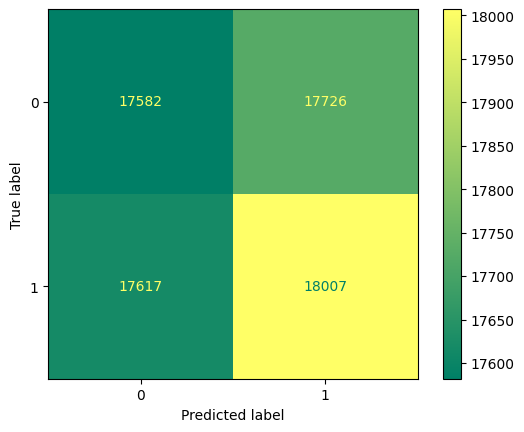

In [84]:
# KNN Classification Results
knn_result = accuracy_score(y_test, y_pred_knn)
print('Accuracy is:', knn_result*100)
print(classification_report(y_test, y_pred_knn))
print('Precision is:', precision_score(y_test, y_pred_knn))
print('Recall is:', recall_score(y_test, y_pred_knn))
# print(confusion_matrix(y_test, y_pred_knn, label=[1,0]))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, cmap='summer')

### Decision Tree Classifier

In [85]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [86]:
# Decision Tree Classifier Predictions
y_pred_dt = dt.predict(X_test)

Accuracy is: 50.05921163931652
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     35308
           1       0.50      0.51      0.50     35624

    accuracy                           0.50     70932
   macro avg       0.50      0.50      0.50     70932
weighted avg       0.50      0.50      0.50     70932

Precision is: 0.5027940765576977
Recall is: 0.5051369863013698


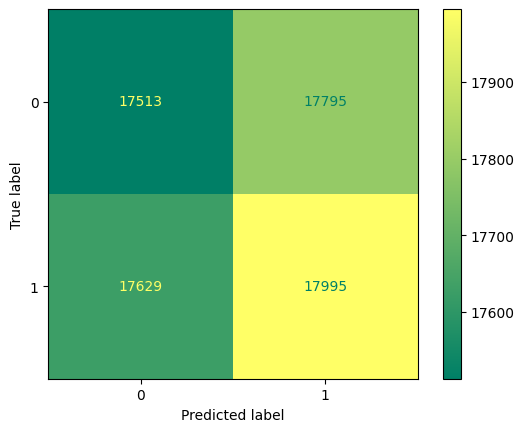

In [87]:
# Decision Tree Classification Results
dt_result = accuracy_score(y_test, y_pred_dt)
print('Accuracy is:', dt_result*100)
print(classification_report(y_test, y_pred_dt))
print('Precision is:', precision_score(y_test, y_pred_dt))
print('Recall is:', recall_score(y_test, y_pred_dt))
# print(confusion_matrix(y_test, y_pred_dt, label=[1,0]))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, cmap='summer')

### Random Forest Classifier

In [88]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [89]:
# Random Forest Classifier Predictions
y_pred_rf = rf.predict(X_test)

Accuracy is: 49.94360796255569
              precision    recall  f1-score   support

           0       0.50      0.51      0.50     35308
           1       0.50      0.49      0.50     35624

    accuracy                           0.50     70932
   macro avg       0.50      0.50      0.50     70932
weighted avg       0.50      0.50      0.50     70932

Precision is: 0.5016910289481227
Recall is: 0.4913541432741972


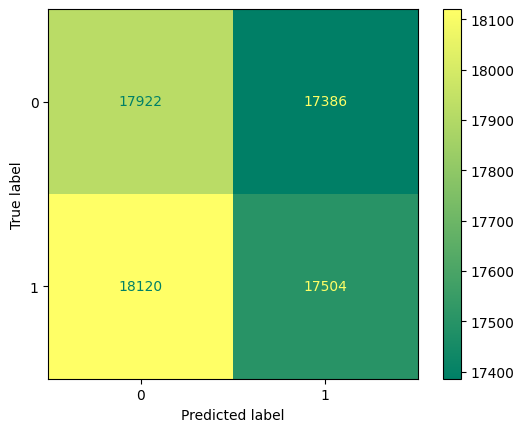

In [90]:
# Random Forest Classification Results
rf_result = accuracy_score(y_test, y_pred_rf)
print('Accuracy is:', rf_result*100)
print(classification_report(y_test, y_pred_rf))
print('Precision is:', precision_score(y_test, y_pred_rf))
print('Recall is:', recall_score(y_test, y_pred_rf))
# print(confusion_matrix(y_test, y_pred_rf, label=[1,0]))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap='summer')

### XGBoost Model

In [91]:
import xgboost as xgb
kfold = KFold(n_splits=10)
xgbm = xgb.XGBClassifier(n_estimators=500, random_state=42)

In [92]:
xgbm.fit(X_train, y_train)
y_pred_xgbm = xgbm.predict(X_test)

Accuracy is: 50.10996447301641
              precision    recall  f1-score   support

           0       0.50      0.49      0.50     35308
           1       0.50      0.51      0.51     35624

    accuracy                           0.50     70932
   macro avg       0.50      0.50      0.50     70932
weighted avg       0.50      0.50      0.50     70932

Precision is: 0.5032783241651386
Recall is: 0.5085055019088255


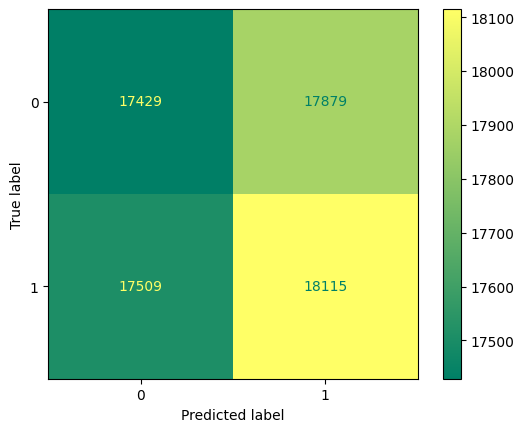

In [93]:
# XGBoost Classification Results
xgbm_result = accuracy_score(y_test, y_pred_xgbm)
print('Accuracy is:', xgbm_result*100)
print(classification_report(y_test, y_pred_xgbm))
print('Precision is:', precision_score(y_test, y_pred_xgbm))
print('Recall is:', recall_score(y_test, y_pred_xgbm))
# print(confusion_matrix(y_test, y_pred_xgbm, label=[1,0]))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgbm, cmap='summer')

In [94]:
xgbm_accuracy = evaluate(xgbm, X_test, y_test)

Model Performance
Accuracy = 0.50%.


After using three different classification techniques, it was found that XGBoost with `n_estimators=500` gives the highest overall accuracy (97%, rounded to nearest integer), alongside highest recall, precision and f1 score. Thus we take this model and try out hyperparamter optimisation techniques to see if it can be improved further. We also use cross-validation methods to determine if this model is consistently performing the best across different segmentations of the data.

### Cross Validation Performance of XGBoost

Check if the performance of the XGBoost model is cosnistent across different folds of cross-validation.

In [95]:
xgbm

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [96]:
# XGBoost Model CV Results
cv_results_xgbm = cross_val_score(xgbm, X_train, y_train, cv=kfold, n_jobs=-1)
print(cv_results_xgbm)
print("Accuracy for XGBoost:", cv_results_xgbm.mean())

[0.49591165 0.50145677 0.50136278 0.49915414 0.50303116 0.49790874
 0.4982377  0.50434701 0.50077541 0.50585084]
Accuracy for XGBoost: 0.5008036191299482


### Hyperparamter Optimisation using Random Search for XGBoost Model

In [97]:
# Random Search XGBoost Model Paramter Grid
random_grid = {"learning_rate": [0.01, 0.1, 1],
              "max_depth": [1, 2, 3],
              "n_estimators": [250, 500, 600]
              }

In [98]:
xgbmodel = xgb.XGBClassifier()
xgbmodel_random = RandomizedSearchCV(estimator=xgbmodel,
                                     param_distributions=random_grid,
                                     n_iter = 3,
                                     cv=3,
                                     verbose=2,
                                     random_state=42,
                                     n_jobs=-1)

xgbmodel_random.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=3, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 1],
                                        'max_depth': [1, 2, 3],
                                        'n_estimators': [250, 500, 600]},
                   random_state=42, verbose=2)

In [99]:
#Get the best random model from the random search
best_random = xgbmodel_random.best_estimator_
print(best_random)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=600,
              n_jobs=None, num_parallel_tree=None, ...)


In [100]:
#Original XGBoost Model Performance compared to Best Random Performance
print('Original XGBoost Model Accuracy =', evaluate(xgbm, X_test, y_test))
print('Best Random XGBoost Model Accuracy =', evaluate(best_random, X_test, y_test))

Model Performance
Accuracy = 0.50%.
Original XGBoost Model Accuracy = 0.5010996447301641
Model Performance
Accuracy = 0.50%.
Best Random XGBoost Model Accuracy = 0.5030451700219929


### Testing with the original dataset


Considering the performance of the best random model was almost the same as the original XGBoost Model, the original model is kept. Hyperparamter optimisation using GridSearch was not possible due to computational limits and the large size of the dataset. This would be a further work to elaborate on.

In [101]:
og_df = pd.read_csv("/content/test_creditcard.csv")

In [102]:
og_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [103]:
#Show imbalanced classes of the original dataset
og_df.Class.value_counts()

,count
Class,
0,284315
1,492


In [104]:
#Get X and y values from the original dataset
X_og = og_df.iloc[:, :-1].values
y_og = og_df.Class.values

In [105]:
X_og

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

In [106]:
#Scale the features of X using standard scalar
X_og_sc = sc.fit_transform(X_og)

In [107]:
#Make predictions on the with the dataset using the XGBoost Model
y_og_pred_xgbm = xgbm.predict(X_og_sc)

Accuracy is: 50.10691450701703
              precision    recall  f1-score   support

           0       1.00      0.50      0.67    284315
           1       0.00      0.46      0.00       492

    accuracy                           0.50    284807
   macro avg       0.50      0.48      0.34    284807
weighted avg       1.00      0.50      0.67    284807

Precision is: 0.001604921760064197
Recall is: 0.4634146341463415


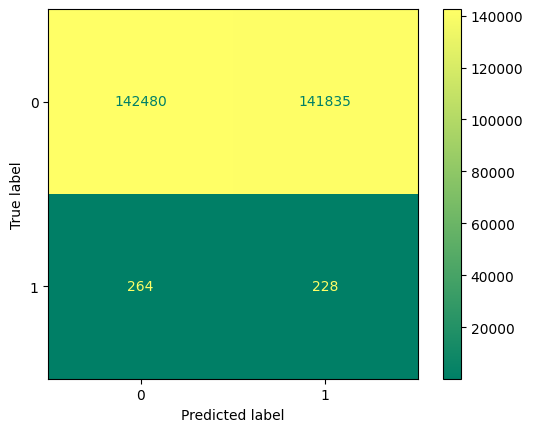

In [108]:
#Get the classification metrics for the predictions made on the original dataset
xgbm_result_og = accuracy_score(y_og, y_og_pred_xgbm)
print('Accuracy is:', xgbm_result_og*100)
print(classification_report(y_og, y_og_pred_xgbm))
print('Precision is:', precision_score(y_og, y_og_pred_xgbm))
print('Recall is:', recall_score(y_og, y_og_pred_xgbm))
# print(confusion_matrix(y_og, y_og_pred_xgbm, label=[1,0]))
ConfusionMatrixDisplay.from_predictions(y_og, y_og_pred_xgbm, cmap='summer')

In [109]:
from sklearn.metrics import average_precision_score
y_og_pred_probs = xgbm.predict_proba(X_og_sc)
auprc = average_precision_score(y_og, y_og_pred_probs[:,1])
print('AUPRC =', auprc)

#It is better to use AUPRC instead of confusion matrix/accuracy for a highly imbalanced dataset that has very little positive-class data. It does not consider anything in the true negative
#classes and thus focuses on the positive class of the dataset only.

AUPRC = 0.010061796482195452


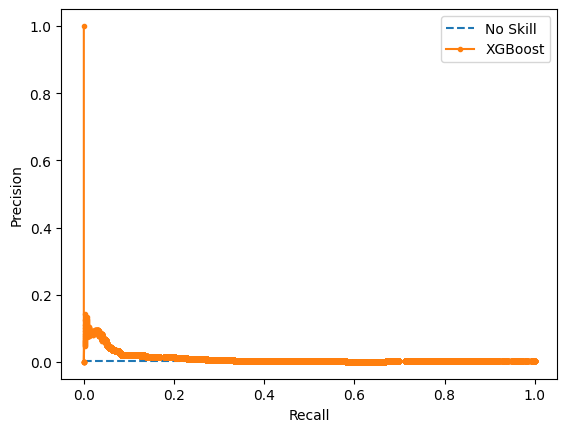

In [110]:
# calculate the no skill line as the proportion of the positive class
no_skill = len(y_og[y_og==1]) / len(y_og)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_og, y_og_pred_probs[:,1])
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='XGBoost')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

#This shows a more realistic overview of the model, which has poor precision.

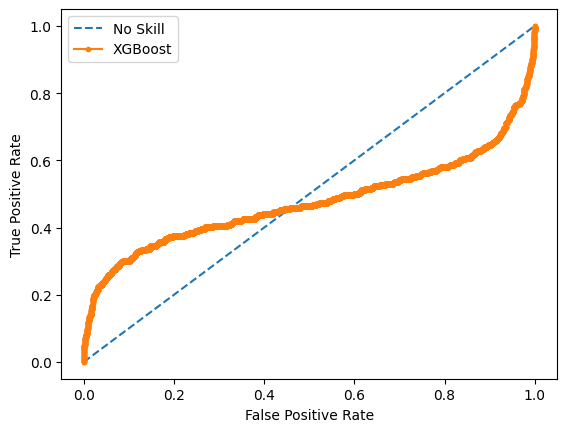

In [111]:
from sklearn.metrics import roc_curve
pos_probs = y_og_pred_probs[:,1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_og, pos_probs)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='XGBoost')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

#The ROC curve is misleading, as the dataset is highly imbalanced. This is to demonstrate why PR-AUC is used instead of ROC.

### Conclusions
We can see from the results of the model when it uses the real credit card fraud dataset, that while it does manage to get the 492 fraudulent transactions classified as fraud (recall = 1), it ends up also classifying most of the real transactions as fraud too (precision = 0.001). This high false positive rate ends up reducing the overall accuracy as well as the area under precision-recall curve (AUPRC).

The model works quite well for its own training and testing dataset, giving an accuracy of almost 96-97% consistently across 10 cross-validation folds. However, it does not seem to be generalisable to the real credit card fraud dataset. Further improvement is needed for this model to become better at differentiating between real and fraudulent transactions from the original dataset, as it currently incorrectly flags most of the data as fraudulent. This would be unsuitable for the use case in flagging fraudulent transactions as it would incorrectly alert credit card holders for most of their regular transactions.


### Further Work
Potential further work for this project could include:
*   Use better computational resources to improve hyperparameter optimisation (e.g. potentially using cloud computing). This would allow the ability to use GridSearch as well instead of only RandomSearch, which is limited as it only tries a few combinations of hyperparamters at random.
*   Use/incorporate original dataset with synthetic dataset to create model.
  * Use techniques to handle imbalance datasets, such as SMOTE/SMOTEENN and create models using the original dataset.
* Use sklearn Pipeline to test models instead of creating them individually to improve efficiency.

